### Import Packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob 

In [2]:
component = col.namedtuple('component','phase intensity')
ind_component = col.namedtuple('component','phase intensity width')
pulse_component = col.namedtuple('pulse_component','frequency comp1 comp2 errors')
component_separation = col.namedtuple('component_separation','frequency separation')

In [3]:
fulldatatype=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])

In [4]:
#Import names of files into an array
pulse_names = glob.glob("/home/lisasmith/19SS_B0818-41//archivefiles/s_archivefiles/f256/full_pdv/pulse*")
ave_names = glob.glob("/home/lisasmith/19SS_B0818-41//archivefiles/s_archivefiles/F/pulse*")
#Sort the names in order
pulse_names=sorted(pulse_names)
ave_names=sorted(ave_names)

New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
New Drift Phase
19
[[2.6393016250884105, 2.9467178074263267, 2.60419577341847, 2.8233916711198437, 2.8929876400785846, 2.84461278485933, 2.6463670331434153, 3.041081501630652, 3.0010674148919416, 2.5863773424950898, 2.6815199620825148, 2.932656417622789, 2.8416670801571717, 2.5249218051080544, 3.090768180550099, 2.7158621676404713, 2.746047854499018, 2.8365237628683695, 2.965828827308447, 2.818076567387034, 2.517877125986247, 2.75430076777996, 2.9590446533791734, 2.8791869333988207, 2.7051663781925366, 2.4812364779174834, 2.523767935756385, 2.526587291944991, 2.7706230330058936, 2.865247651650298, 3.0466116829076615, 2.727556960825148, 2.6237744613752483, 2.5429609795677752, 2.1759428019646396, 2.525605

(300.0, 750.0, 0.0, 18.0)

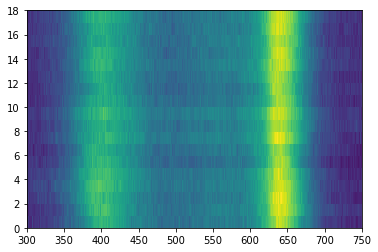

In [8]:
#Get 18 pulses to make up the drift phase
modfold = []

for p in range(0,19):
    print('New Drift Phase')
    
    ave_y = np.array([0]*1024)
    
    #For each drift phase, get all the pulses which need averaging
    for a,pulse in enumerate(ave_names[p::19]):
        #Load in a pulse at a time
        #print(a)
        #single_pulse = np.loadtxt(fname=ave_names[a], dtype=fulldatatype)
        scrunched_pulse = np.loadtxt(fname=pulse, dtype=fulldatatype)
        no_freq_bands = max(scrunched_pulse['frequency'])+1

        fit_spulse = []
        """
        #Look at one frequency at a time
        for b in range(no_freq_bands):
            freqband = b
            f = single_pulse['frequency'] == freqband
            x=single_pulse['phase'][f]
            y=single_pulse['intensity'][f]
            noise = sigmaClip(y)
            error = np.nanstd(noise[1])
        """
        
        #Just trying with average - needs to be repeated for each frequency
        y=np.array(scrunched_pulse['intensity'])
        ave_y=ave_y+y
        
    ave_y=ave_y/len(pulse_names[p::19])
    modfold.append(list(ave_y))
    
x=np.array(range(1024))
#plt.plot(x,ave_y)

print(len(modfold))
print(modfold)

#b, a = np.meshgrid(np.linspace(0, 5, 130), np.linspace(0,5, 130))

plt.pcolormesh(modfold)
plt.axis([300,750,0,18])

In [6]:
lst=list(range(50))
print(lst)
print(lst[18::18])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[18, 36]


In [7]:
t=np.array([0]*18)
h=np.array([10]*18)
print(t,h)
g=t+h
print(g)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
